In [158]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
import numpy as np
from sklearn.preprocessing import PowerTransformer, StandardScaler
from sklearn.mixture import BayesianGaussianMixture
import seaborn as sns
import math
import numpy as np
from math import sin, cos, atan2, sqrt
import pandas as pd
from pathlib import Path
import pyproj
from pyproj import Proj, transform
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold, TimeSeriesSplit
from sklearn.metrics import accuracy_score
import lightgbm as lgb
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore", category=Warning)

### Đọc dữ liệu

In [159]:
df = pd.read_csv('data-kiem-tra-2.csv', encoding='latin-1', sep=',')
df.head(5)

,date,truong_1,truong_2,truong_3,truong_4,truong_5
0,10.05.2013,4,58,3773,299.0,1
1,26.05.2013,4,58,3768,249.0,1
2,19.05.2013,4,58,4036,419.0,1
3,25.05.2013,4,58,12878,149.0,1
4,15.05.2013,4,58,12885,148.0,1


### Trực quan hóa dữ liệu

<Axes: >

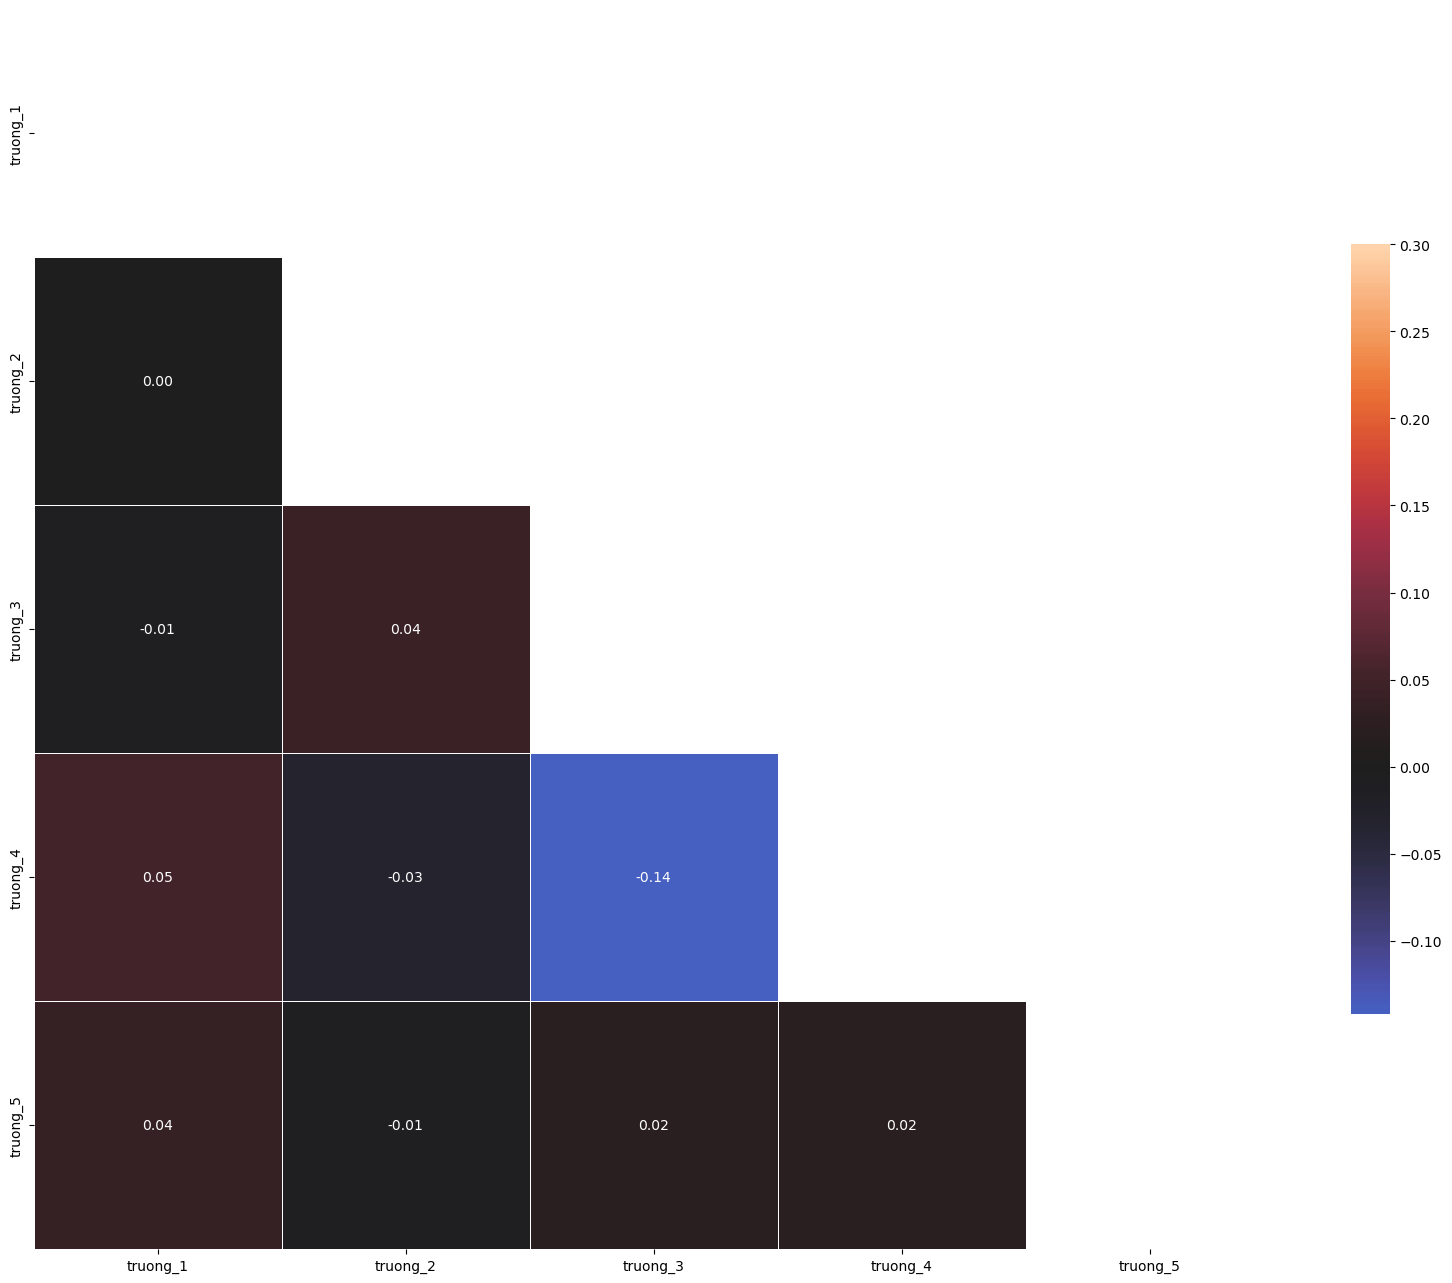

In [160]:
df_toheat= df.drop(labels='date', axis=1)
mask = np.triu(np.ones_like(df_toheat.corr(), dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
f, ax = plt.subplots(figsize=(20,20))
sns.heatmap(df_toheat.corr(), mask=mask, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True,fmt='.2f')

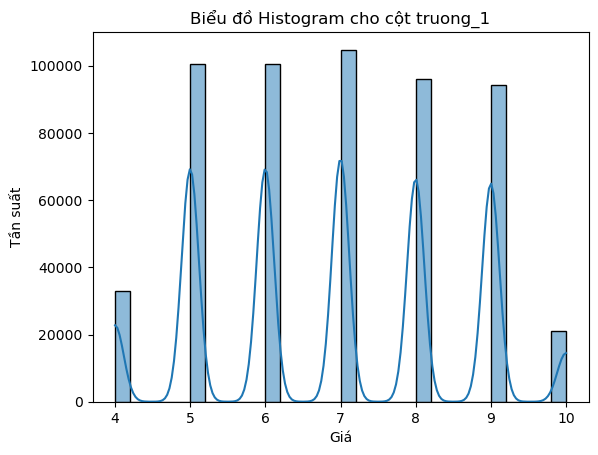

In [161]:
# Tạo biểu đồ histogram bằng seaborn
sns.histplot(df['truong_1'], bins=30, kde=True)

# Thêm tiêu đề và nhãn trục
plt.title('Biểu đồ Histogram cho cột truong_1')
plt.xlabel('Giá')
plt.ylabel('Tần suất')

# Hiển thị biểu đồ
plt.show()

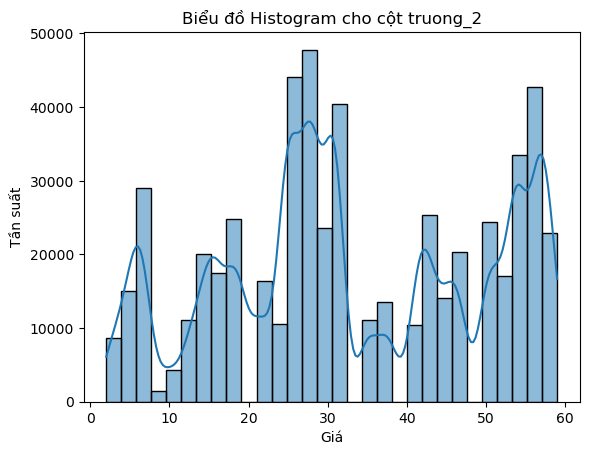

In [162]:
# Tạo biểu đồ histogram bằng seaborn
sns.histplot(df['truong_2'], bins=30, kde=True)

# Thêm tiêu đề và nhãn trục
plt.title('Biểu đồ Histogram cho cột truong_2')
plt.xlabel('Giá')
plt.ylabel('Tần suất')

# Hiển thị biểu đồ
plt.show()

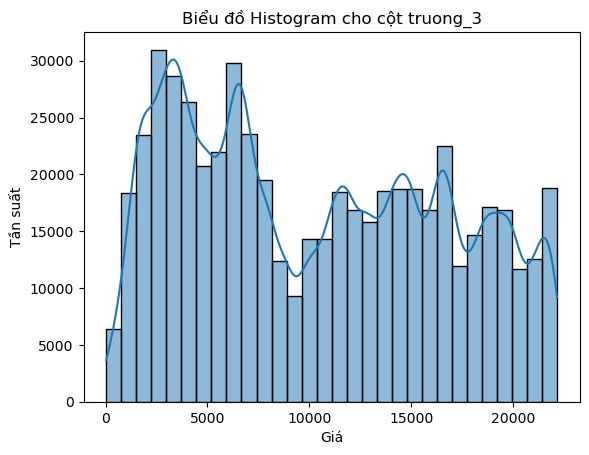

In [163]:
# Tạo biểu đồ histogram bằng seaborn
sns.histplot(df['truong_3'], bins=30, kde=True)

# Thêm tiêu đề và nhãn trục
plt.title('Biểu đồ Histogram cho cột truong_3')
plt.xlabel('Giá')
plt.ylabel('Tần suất')

# Hiển thị biểu đồ
plt.show()

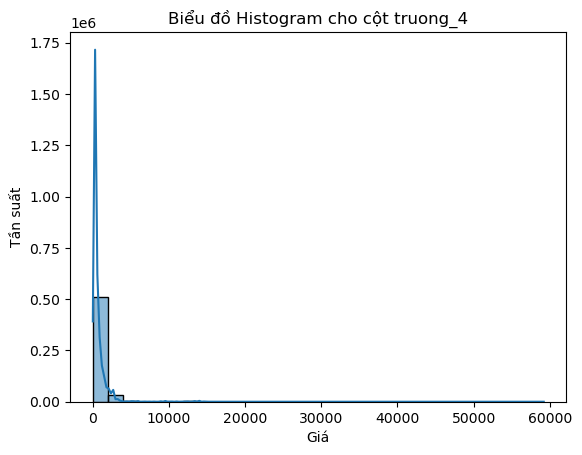

In [164]:
# Tạo biểu đồ histogram bằng seaborn
sns.histplot(df['truong_4'], bins=30, kde=True)

# Thêm tiêu đề và nhãn trục
plt.title('Biểu đồ Histogram cho cột truong_4')
plt.xlabel('Giá')
plt.ylabel('Tần suất')

# Hiển thị biểu đồ
plt.show()

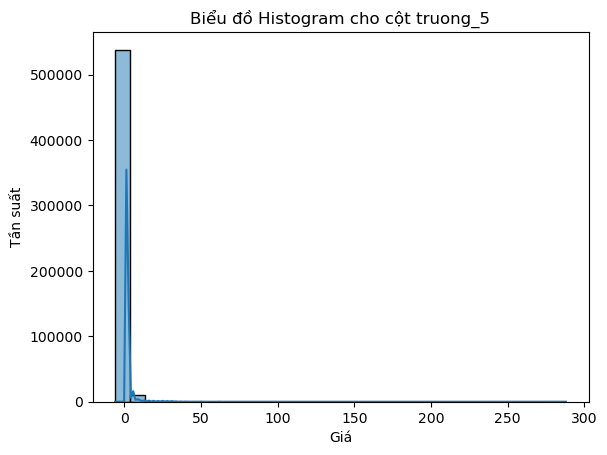

In [165]:
# Tạo biểu đồ histogram bằng seaborn
sns.histplot(df['truong_5'], bins=30, kde=True)

# Thêm tiêu đề và nhãn trục
plt.title('Biểu đồ Histogram cho cột truong_5')
plt.xlabel('Giá')
plt.ylabel('Tần suất')

# Hiển thị biểu đồ
plt.show()

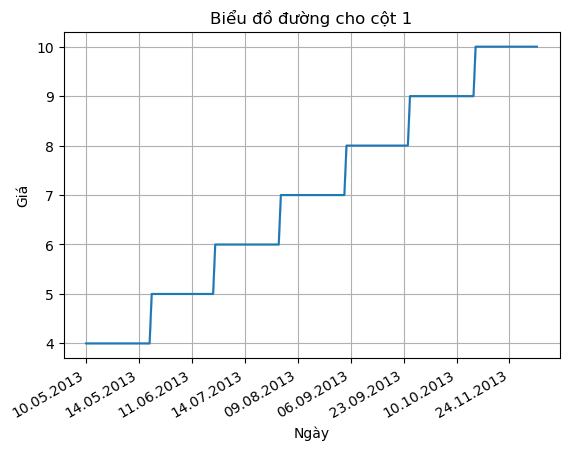

In [166]:
# Tạo biểu đồ đường bằng seaborn
sns.lineplot(x=df['date'], y=df['truong_1'], data=df)

# Thêm tiêu đề và nhãn trục
plt.title('Biểu đồ đường cho cột 1')
plt.xlabel('Ngày')
plt.ylabel('Giá')

# Giảm số lượng nhãn trục x
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(nbins=10))

# Định dạng lại các nhãn trục x
plt.gcf().autofmt_xdate()
plt.grid(True)
plt.show()

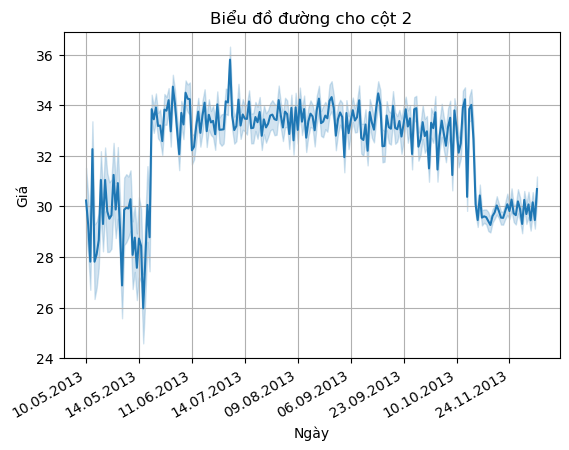

In [167]:
# Tạo biểu đồ đường bằng seaborn
sns.lineplot(x=df['date'], y=df['truong_2'], data=df)

# Thêm tiêu đề và nhãn trục
plt.title('Biểu đồ đường cho cột 2')
plt.xlabel('Ngày')
plt.ylabel('Giá')

# Giảm số lượng nhãn trục x
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(nbins=10))

# Định dạng lại các nhãn trục x
plt.gcf().autofmt_xdate()
plt.grid(True)
plt.show()

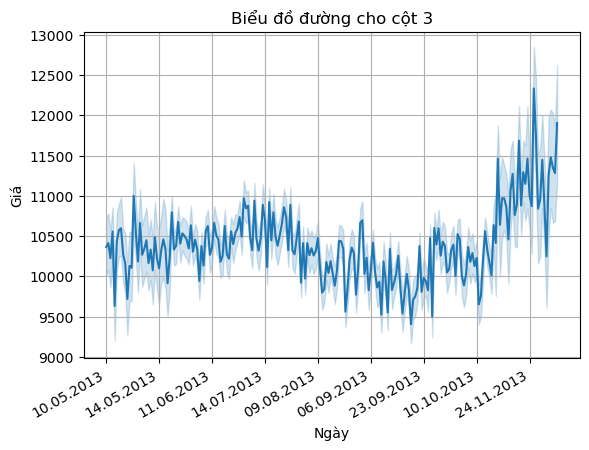

In [168]:
# Tạo biểu đồ đường bằng seaborn
sns.lineplot(x=df['date'], y=df['truong_3'], data=df)

# Thêm tiêu đề và nhãn trục
plt.title('Biểu đồ đường cho cột 3')
plt.xlabel('Ngày')
plt.ylabel('Giá')

# Giảm số lượng nhãn trục x
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(nbins=10))

# Định dạng lại các nhãn trục x
plt.gcf().autofmt_xdate()
plt.grid(True)
plt.show()

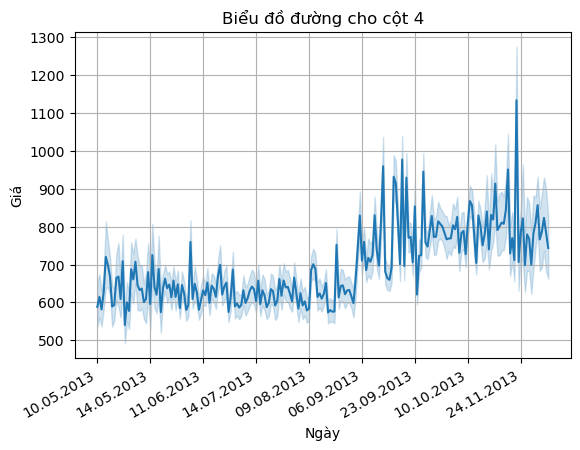

In [169]:
# Tạo biểu đồ đường bằng seaborn
sns.lineplot(x=df['date'], y=df['truong_4'], data=df)

# Thêm tiêu đề và nhãn trục
plt.title('Biểu đồ đường cho cột 4')
plt.xlabel('Ngày')
plt.ylabel('Giá')

# Giảm số lượng nhãn trục x
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(nbins=10))

# Định dạng lại các nhãn trục x
plt.gcf().autofmt_xdate()
plt.grid(True)
plt.show()


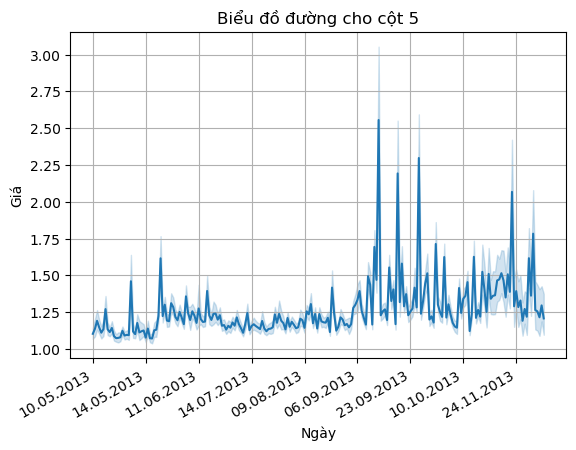

In [170]:
# Tạo biểu đồ đường bằng seaborn
sns.lineplot(x=df['date'], y=df['truong_5'], data=df)

# Thêm tiêu đề và nhãn trục
plt.title('Biểu đồ đường cho cột 5')
plt.xlabel('Ngày')
plt.ylabel('Giá')

# Giảm số lượng nhãn trục x
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(nbins=10))

# Định dạng lại các nhãn trục x
plt.gcf().autofmt_xdate()
plt.grid(True)
plt.show()

### Tiền xử lý

In [171]:
df = df.drop_duplicates(subset=['date'])

In [172]:
df['date'] = pd.to_datetime(df['date'], format='%d.%m.%Y')
df.set_index('date', inplace=True)

In [173]:
df = df.sort_values(by='date')
# df.index = np.arange(1, len(df)+1)
# df.head()

### SARIMA

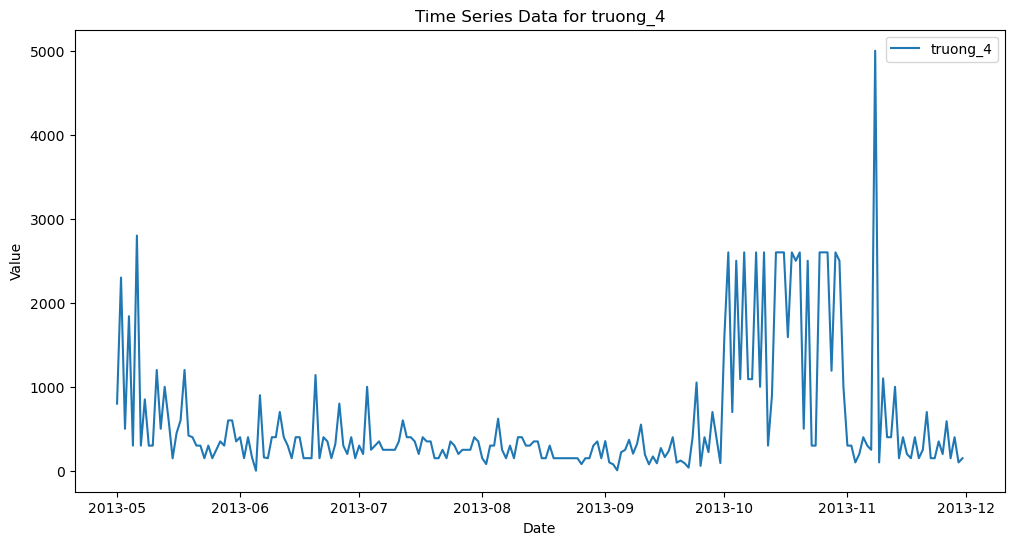

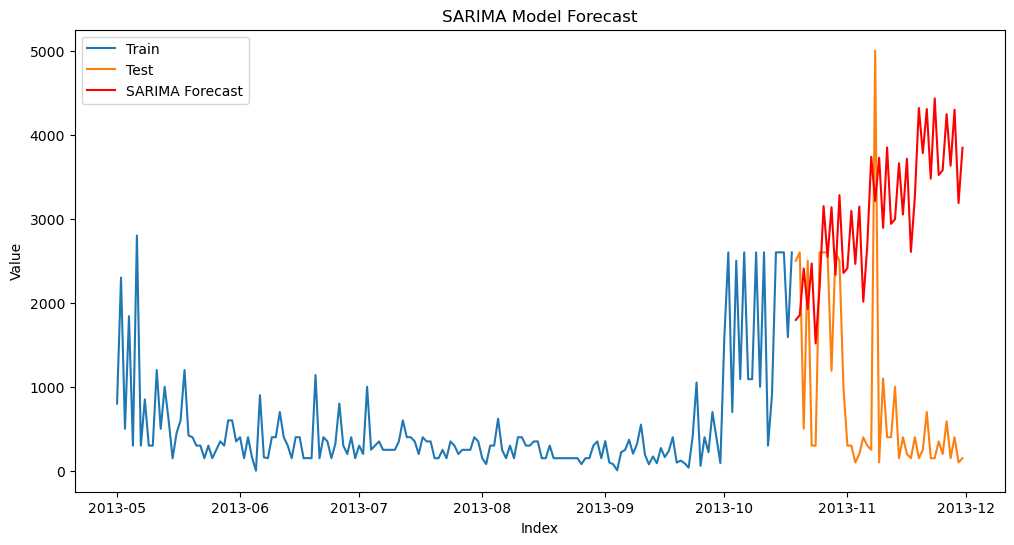

2013-10-19    1794.238853
2013-10-20    1851.559473
2013-10-21    2406.640880
2013-10-22    1926.277597
2013-10-23    2466.307060
2013-10-24    1515.631142
2013-10-25    2183.171233
2013-10-26    3150.014161
2013-10-27    2542.732546
2013-10-28    3136.641036
2013-10-29    2331.459066
2013-10-30    3279.644566
2013-10-31    2353.540551
2013-11-01    2410.688468
2013-11-02    3092.399434
2013-11-03    2461.476204
2013-11-04    3144.456360
2013-11-05    2011.628094
2013-11-06    2670.032897
2013-11-07    3735.881314
2013-11-08    3210.602118
2013-11-09    3724.313123
2013-11-10    2891.608683
2013-11-11    3848.006238
2013-11-12    2938.287629
2013-11-13    2995.458869
2013-11-14    3660.070537
2013-11-15    3049.478021
2013-11-16    3713.154972
2013-11-17    2604.923468
2013-11-18    3264.561846
2013-11-19    4317.041154
2013-11-20    3780.688843
2013-11-21    4305.229236
2013-11-22    3476.241265
2013-11-23    4431.529914
2013-11-24    3519.598718
2013-11-25    3576.766808
2013-11-26  

In [174]:

from statsmodels.tsa.statespace.sarimax import SARIMAX

# Chọn cột 'truong_4' để phân tích chuỗi thời gian
time_series = df['truong_4']
train_size = int(len(time_series) * 0.8)
train, test = time_series[:train_size], time_series[train_size:]
# Vẽ biểu đồ chuỗi thời gian
plt.figure(figsize=(12, 6))
plt.plot(time_series, label='truong_4')
plt.title('Time Series Data for truong_4')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

# Áp dụng mô hình SARIMA
# Chọn các tham số (p, d, q) và (P, D, Q, s) cho mô hình SARIMA
p = 1
d = 1
q = 1
P = 1
D = 1
Q = 1
s = 12  # Chu kỳ mùa vụ, ví dụ 12 cho dữ liệu hàng tháng

# Khớp mô hình SARIMA
sarima_model = SARIMAX(train, order=(p, d, q), seasonal_order=(P, D, Q, s))
sarima_fit = sarima_model.fit()

forecast_steps = len(test)
sarima_forecast = sarima_fit.forecast(steps=forecast_steps)
# Vẽ biểu đồ chuỗi thời gian gốc, tập huấn luyện, tập kiểm tra và dự báo ARIMA
plt.figure(figsize=(12, 6))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(test.index, sarima_forecast, label='SARIMA Forecast', color='red')
plt.title('SARIMA Model Forecast')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.show()

# In kết quả dự báo
print(sarima_forecast)

In [175]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
# Tính các độ đo đánh giá
mae = mean_absolute_error(test, sarima_forecast)
mse = mean_squared_error(test, sarima_forecast)
rmse = np.sqrt(mse)

# In các độ đo đánh giá
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

Mean Absolute Error (MAE): 2414.865188809448
Mean Squared Error (MSE): 7215861.258778622
Root Mean Squared Error (RMSE): 2686.2355181142666


### ARIMAX

In [176]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

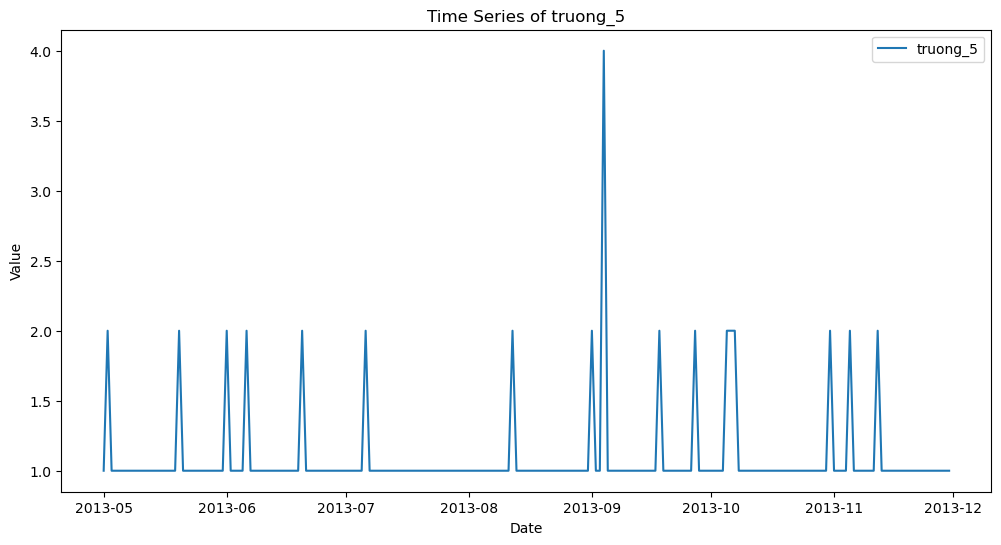

                               SARIMAX Results                                
Dep. Variable:               truong_5   No. Observations:                  214
Model:               SARIMAX(1, 1, 1)   Log Likelihood                 -83.066
Date:                Tue, 04 Jun 2024   AIC                            180.131
Time:                        12:18:07   BIC                            203.660
Sample:                    05-01-2013   HQIC                           189.640
                         - 11-30-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
truong_1       0.0766      0.154      0.499      0.618      -0.225       0.378
truong_2      -0.0136      0.009     -1.581      0.114      -0.030       0.003
truong_3    7.638e-06   3.54e-06      2.161      0.0

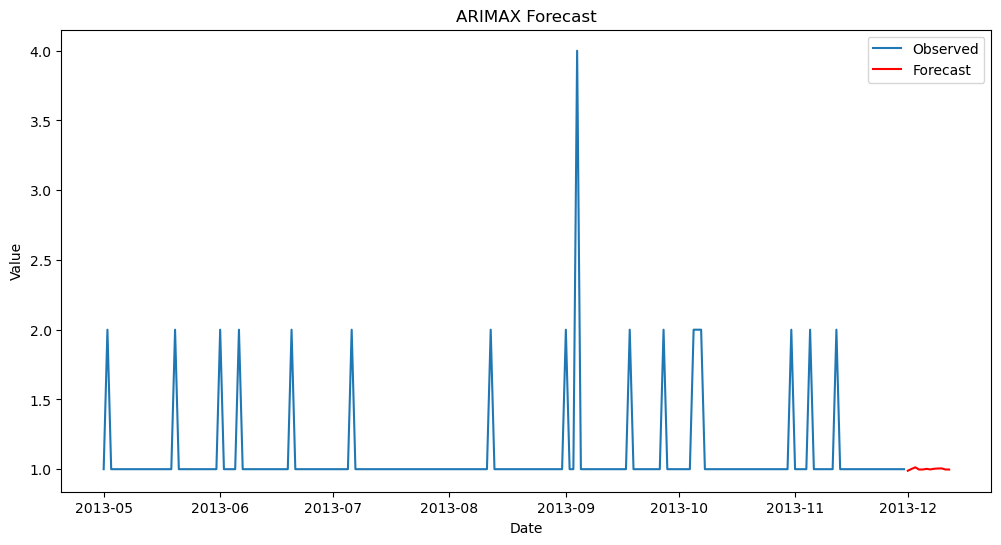

In [179]:
# Define the target variable and exogenous variables
# For example, let's predict 'truong_3' using the other columns as exogenous variables
endog = df['truong_5']
exog = df.drop(columns=['truong_5'])

# Plot the target variable
plt.figure(figsize=(12, 6))
plt.plot(endog, label='truong_5')
plt.title('Time Series of truong_5')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

# Fit the ARIMAX model
model = SARIMAX(endog, exog=exog, order=(1, 1, 1))
arimax_fit = model.fit(disp=False)

# Print the summary of the model
print(arimax_fit.summary())

# Forecast future values
steps = 12  # Adjust steps as needed
forecast = arimax_fit.get_forecast(steps=steps, exog=exog.iloc[-steps:])
forecast_mean = forecast.predicted_mean

# Plot the forecasted values
plt.figure(figsize=(12, 6))
plt.plot(endog, label='Observed')
plt.plot(forecast_mean, label='Forecast', color='red')
plt.title('ARIMAX Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()